# Fase 4 - Modelado

En esta fase entrenaremos un modelo de **Regresión Lineal** para predecir el precio de los autos BMW.  
Se dividirán los datos en entrenamiento y prueba, se ajustará el modelo y se evaluará el rendimiento.

In [40]:
import os
import joblib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [42]:
df = pd.read_csv("../data/03_primary/bmw_sales_clean.csv")
print("✅ Dataset cargado")
print(df.head())
print(df.columns)

✅ Dataset cargado
      Model  Year         Region  Color Fuel_Type Transmission  Engine_Size_L  \
0  5 Series  2016           Asia    Red    Petrol       Manual            3.5   
1        i8  2013  North America    Red    Hybrid    Automatic            1.6   
2  5 Series  2022  North America   Blue    Petrol    Automatic            4.5   
3        X3  2024    Middle East   Blue    Petrol    Automatic            1.7   
4  7 Series  2020  South America  Black    Diesel       Manual            2.1   

   Mileage_KM  Price_USD  Sales_Volume Sales_Classification  car_age  
0      151748      98740          8300                 High        9  
1      121671      79219          3428                  Low       12  
2       10991     113265          6994                  Low        3  
3       27255      60971          4047                  Low        1  
4      122131      49898          3080                  Low        5  
Index(['Model', 'Year', 'Region', 'Color', 'Fuel_Type', 'Transmission

In [43]:
X = df.drop(columns=["Price_USD"])
y = df["Price_USD"]

# dividir en train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("✅ Datos separados en entrenamiento y prueba")

✅ Datos separados en entrenamiento y prueba


In [44]:
numeric_features = ["Year", "Engine_Size_L", "Mileage_KM", "Sales_Volume"]
categorical_features = [
    "Model", "Region", "Color", "Fuel_Type", "Transmission", "Sales_Classification"
]

numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)

In [45]:
pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())
])

pipeline.fit(X_train, y_train)
print("✅ Modelo entrenado")

✅ Modelo entrenado


In [46]:
y_pred = pipeline.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"📊 MSE: {mse:.2f}")
print(f"📊 R2: {r2:.2f}")

📊 MSE: 677756380.65
📊 R2: -0.00


In [47]:
os.makedirs("../data/06_models", exist_ok=True)
joblib.dump(pipeline, "../data/06_models/bmw_price_model.pkl")
print("✅ Modelo guardado en ../data/06_models/bmw_price_model.pkl")

✅ Modelo guardado en ../data/06_models/bmw_price_model.pkl


C:\Users\franc\AppData\Local\Temp\ipykernel_12108\3694027386.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Coeficiente", y="Feature", data=coeficientes.head(15), palette="viridis")


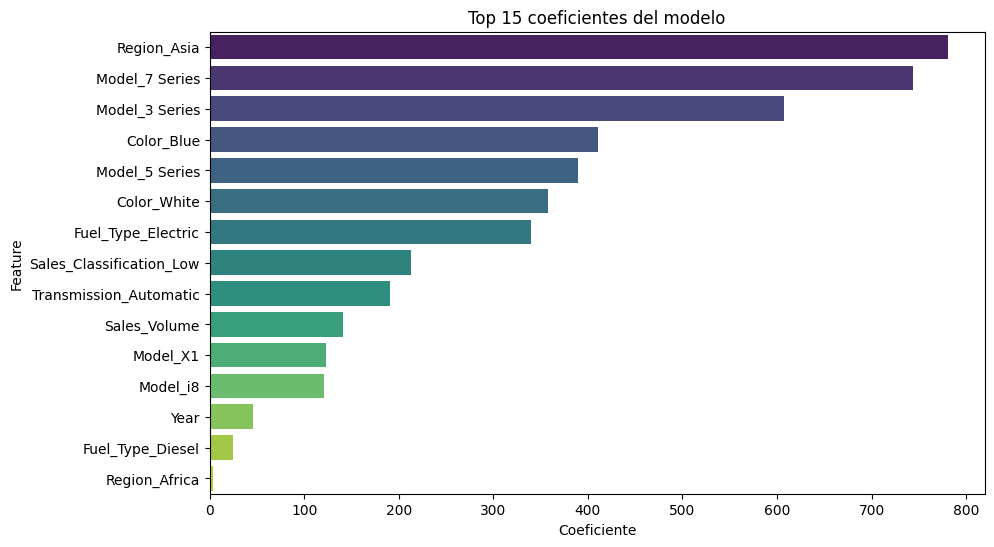

In [48]:
# Extraer coeficientes
feature_names = (
    numeric_features +
    list(pipeline.named_steps["preprocessor"].transformers_[1][1].get_feature_names_out(categorical_features))
)
coeficientes = pd.DataFrame({
    "Feature": feature_names,
    "Coeficiente": pipeline.named_steps["regressor"].coef_
}).sort_values(by="Coeficiente", ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x="Coeficiente", y="Feature", data=coeficientes.head(15), palette="viridis")
plt.title("Top 15 coeficientes del modelo")
plt.show()